# Linear regression - Cross validation

## Libraries

In [1]:
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic data set

The data set is generated based on $y = w_o + w_1 x + w_2 x^2 + \epsilon$ 

In [2]:
wo = +2.0
w1 = -3.0
w2 = +1.0

We generate a data set of $m$ points by adding Gaussian noise $\epsilon \sim N(0,\sigma)$ to the model 

In [3]:
sigma = 1.0
m = 50

# Note: the shape of X is such to be compatible with Scikit-Learn classes
x = np.random.rand(m,1)*5.0 - 1.0
y = wo + w1*x + w2*x**2 + np.random.normal(0, sigma, size=(m, 1))

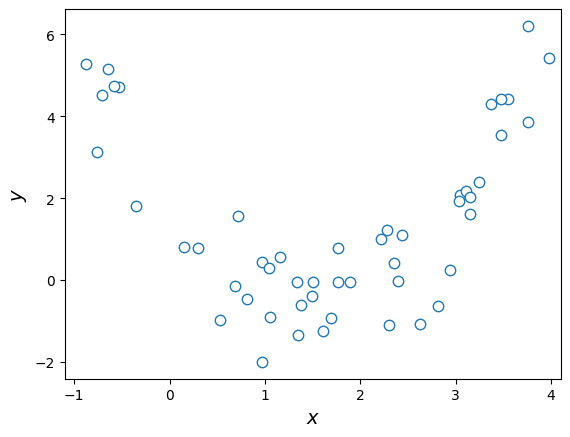

In [4]:
# plotting the generated data set
plt.plot(x, y, ".", markersize=15, markerfacecolor='white')
plt.xlim([-1.1,4.1])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

## Cross validation

[Cross validation](https://github.com/concordia-grad-computing-seminars/data-engineering/blob/main/ML/knn/knn_reg-cross_validation.ipynb) can be used to select the model hyper-parameters. In our case, it will be the degree of the polynomial model.

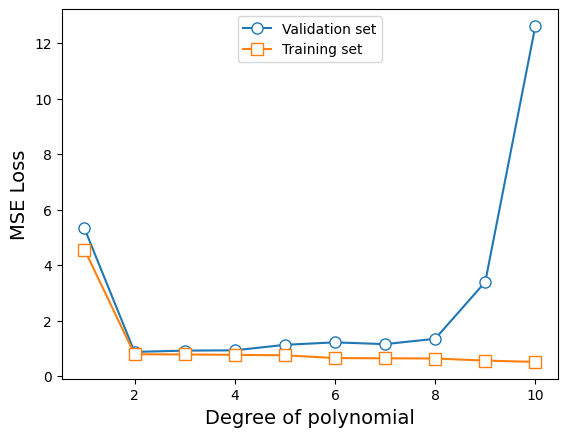

In [5]:
MSE_train = []
MSE_valid = []

n_max = 11
for n in range(1, n_max):
    poly_model = make_pipeline(PolynomialFeatures(n),
                               LinearRegression())
    scores = cross_validate(poly_model, np.c_[x], y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    MSE_valid = np.append(MSE_valid, -scores['test_score'].mean())
    MSE_train = np.append(MSE_train, -scores['train_score'].mean())

plt.plot(range(1, n_max), MSE_valid, "o-", markersize=8, markerfacecolor='white', label='Validation set')
plt.plot(range(1, n_max), MSE_train, "s-", markersize=8, markerfacecolor='white', label='Training set')
plt.xlabel('Degree of polynomial', fontsize=14)
plt.ylabel('MSE Loss', fontsize=14)
plt.legend(loc='upper center')
plt.show()

To reduce statistical errors, one can use [`RepeatedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html) which will repeat several times the partitioning in a given fold.

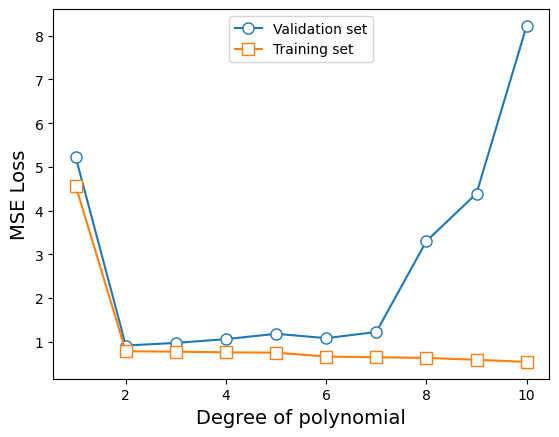

In [6]:
MSE_valid = []
MSE_train = []

n_max = 11
for n in range(1, n_max):
    poly_model = make_pipeline(PolynomialFeatures(n),
                               LinearRegression())
    scores = cross_validate(poly_model, np.c_[x], y,
                            cv=RepeatedKFold(n_splits=5, n_repeats=100),
                            scoring='neg_mean_squared_error', return_train_score=True)
    MSE_valid = np.append(MSE_valid, -scores['test_score'].mean())
    MSE_train = np.append(MSE_train, -scores['train_score'].mean())

plt.plot(range(1, n_max), MSE_valid, "o-", markersize=8, markerfacecolor='white', label='Validation set')
plt.plot(range(1, n_max), MSE_train, "s-", markersize=8, markerfacecolor='white', label='Training set')
plt.xlabel('Degree of polynomial', fontsize=14)
plt.ylabel('MSE Loss', fontsize=14)
plt.legend(loc='upper center')
plt.show()

## Suggested activities

* Repeat the calculations by changing the noise level in the synthetic data set. How does the noise level affect the results?
* Repeat the calculations by changing the equation generating the synthetic data set (use higher/lower degrees of the polynomial)